This scripts aims at analyzing the output Exp5, that is, the CMD with trained other properties (TPSA, MR, LASA): correctness, diversity and novelty. Only one iteration is used. The output is conditioned to TPSA = 140 and MR = 40.

In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

/home/gonzalo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
#######################################
### Unconditional CMD output molecules
#######################################

# Init the time counter for the whole notebook
start = time.time()



# 2D plot of TPSA vs MR vs LASA of output set
smis = mf.smif2smis('./train3-300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['tpsa'] = smidf['mol'].apply(Descriptors.TPSA)
smidf['mr'] = smidf['mol'].apply(Descriptors.MolMR)
smidf['lasa'] = smidf['mol'].apply(Descriptors.LabuteASA)

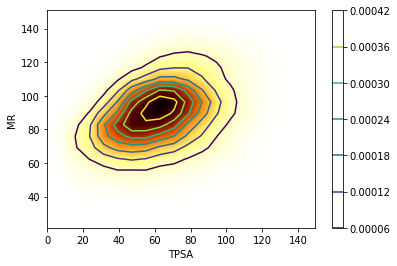

In [3]:
mf.bidiplot(np.asarray(smidf[["tpsa","mr"]]), "TPSA","MR", d = True)

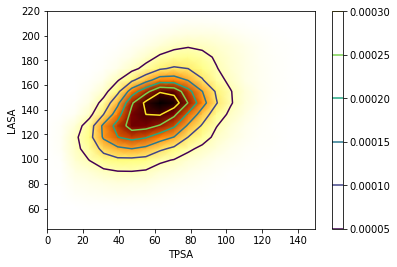

In [4]:
mf.bidiplot(np.asarray(smidf[["tpsa","lasa"]]), "TPSA","LASA", d = True)

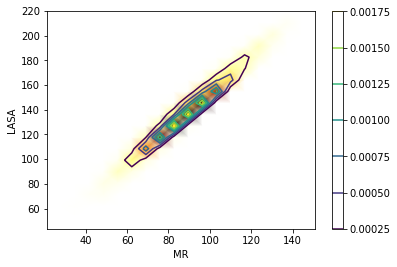

In [5]:
mf.bidiplot(np.asarray(smidf[["mr","lasa"]]), "MR","LASA", d = True)

In [7]:
#######################################
### Conditional CMD output molecules
#######################################
it = range(300000,300001)
df_co, cls_co = mf.wholean(it = it, name_train = "train3-", name_pref = "con3-")

IOError: File ./con3-300000.smi does not exist

In [ ]:
# Show the results dataframe

df_co

In [ ]:
# Save the results dataframe

df_co.to_csv("analysis3-exp5-co.csv")

In [ ]:
# Plot the clusters distributions and cluster size distribution

mf.plotmulticlus(cls_co, 10, 4)

In [ ]:
# 2D plot of TPSA vs MR vs LASA of output set
smis = mf.smif2smis('./con3-300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['tpsa'] = smidf['mol'].apply(Descriptors.TPSA)
smidf['mr'] = smidf['mol'].apply(checkmr)
smidf['lasa'] = smidf['mol'].apply(Descriptors.LabuteASA)

In [ ]:
mf.bidiplot(np.asarray(smidf[['tpsa','mr']].dropna()), "TPSA","MR", d = True)

In [ ]:
mf.bidiplot(np.asarray(smidf[['tpsa','lasa']].dropna()), "TPSA","LASA", d = True)

In [ ]:
mf.bidiplot(np.asarray(smidf[['mr','lasa']].dropna()), "MR","LASA", d = True)

In [ ]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp5Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))